# DSC 340 Lab 5: Image Segmentation and Compression


## Objectives

In this lab we will use **NumPy** and the **$K$-means clustering algorithm** to compress and segment a photograph.  

The purpose of this lab is to help you:

* gain experience with **unsupervised machine learning** in contrast with the supervised methods that were our focus in most of the earlier labs; 
* learn to apply the **$K$-means** clustering algorithm to an interesting problem;
* gain experience **importing, exporting, and manipulating RGB images** with the **Pillow (PIL)** imaging library;
* come to regard **images as** yet another form of numeric **data**;
* explore the problem of **image segmentation**;
* explore the problem of **image compression**;
* gain direct experience working with the **NumPy** linear algebraic library. 
ename your file. The format for all the labs is:_ `dsc340s25_lab05_lastname_firstname.ipynb`. 




Gabriel Eze

Nolan Johnson

DSC 340 S25  

Lab 5: Image Segmentation & Compression


## Import libraries

We import NumPy for handling array operations, PIL to handle images, KMeans for clustering, and Matplotlib for displaying images.

In [1]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## Import an image 

We use `PIL.Image.open()` to load the image file and `matplotlib.pyplot` to display it without axis ticks.

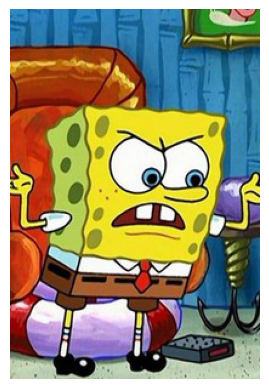

In [5]:
img = Image.open('spongebob.jpeg') # Load the image file
plt.imshow(img)
plt.axis('off');

## Convert the image to a NumPy array

The image is converted into a 3D array with shape (height, width, RGB channels).

In [6]:
# Convert image to 3D array
img_arr = np.array(img) 
print(img_arr.shape)
height, width, channels = img_arr.shape # Get dimensions

(305, 206, 3)


## Reshape the array into a data matrix $\mathbf{X}$ with rows of pixels

We reshape the image into a 2D array where each row represents a single pixel's RGB values.

In [7]:
pixels = img_arr.reshape(-1, 3) # Flatten dimensions


## Use $K$ means to segment the image into its $K$ mean colors 

We define a function `compress_image(k)` that applies the K-Means clustering algorithm to the image pixels. 

Each pixel in the image is treated as a data point in a three-dimensional space, where the three features are the red, green, and blue color channels. The K-Means algorithm then groups these pixels into a finite number of k clusters based on color similarity.

Once the clusters are formed, each pixel is reassigned the color of its corresponding cluster center to reduce the number of unique colors in the image and produced a compressed version of the original image. 

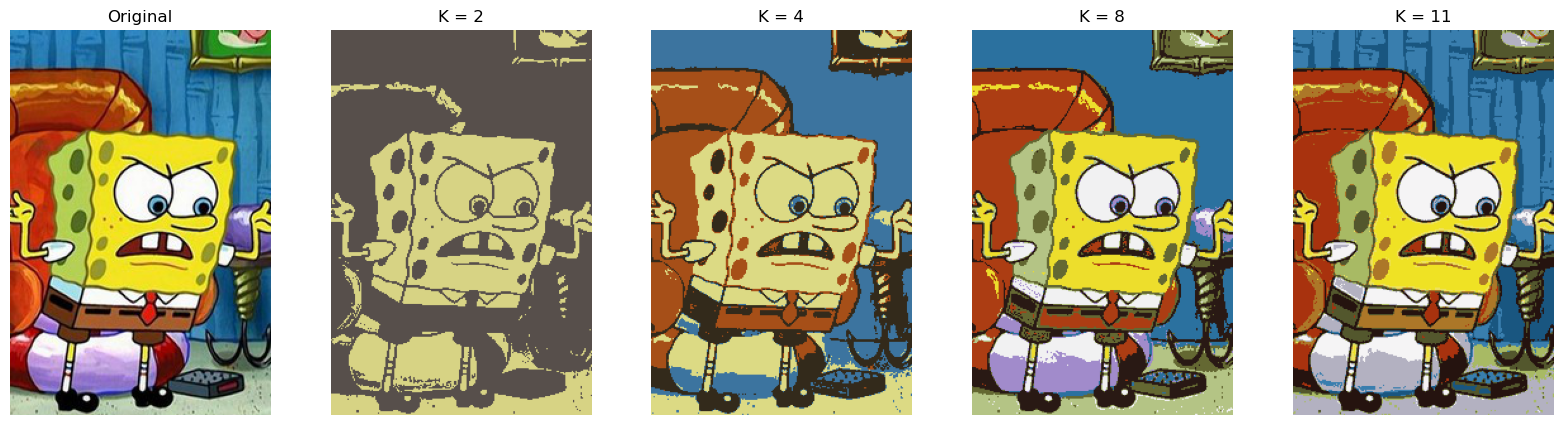

In [8]:
def compress_image(k):
    # Create k-means model
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 1)

    # Fit model
    kmeans.fit(pixels)

    # Replace pixel colors with cluster center colors
    comp_pixels = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape back to original image dimension
    comp_img = comp_pixels.reshape(height, width, channels)

    # Convert to image format
    return comp_img.astype(np.uint8)

k_vals = [2, 4, 8, 11]
results = {'Original': img_arr}

# Update compressed images in array format
for k in k_vals: 
    results['K = ' + str(k)] = compress_image(k)

# Display compression results
plt.figure(figsize=(20, 5))
for i, (name, img) in enumerate(results.items()):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')
plt.show()

## Save an image that you like

Here, we will save a compressed image of choice in our working directory for comparison.

In [9]:
Image.fromarray(results['K = 8']).save('compressed.jpg')

## Problem-solving: Lossy Compression Ratio

For this problem, we estimate how much compression is achieved during image segmentation. The idea is to compare the area of the original image to compressed image, both measured in bits.

The original image stores each pixel using 24 bits (8 bits per channel across the three RGB channels). After applying K-Means, compression is achieved by storing k color centroids (each occupying 24 bits also) and labeling individual pixels to respective centroids. 

In [10]:
for k in k_vals:
    original = height * width * 24 # 24 bits per pixel
    
    compressed = k * 24 + height * width * 8 # 24 bits per centroid, 8 bits per label
    
    ratio = original / compressed 
    
    print("K =", k, "Ratio:", round(ratio, 1), "to 1")

K = 2 Ratio: 3.0 to 1
K = 4 Ratio: 3.0 to 1
K = 8 Ratio: 3.0 to 1
K = 11 Ratio: 3.0 to 1


## Submission


Conclusion:
I applied a k-means algorithm to detect pixels by their RGB values in order to reconstruct the original image through clustering with the pixel data. In fitting the model, for a discrete set of k values, I performed a sequence of clustering on the pixel data before converting back to a numpy array and selecting a jpeg file.

References:
https://36-sure.github.io/2024/lectures/05-kmeans.html#/appendix-k-means-for-image-segmentation-and-compression-1

https://www.google.com/search?q=how+to+display+compressed+images+after+k-means+jupyter&sca_esv=cc91aa7b516a412e&sxsrf=AHTn8zo6w-u1JX8CucRB4XkfkkQJ_lmVbg%3A1745362110414&ei=vhwIaJn-GKqvptQP_aeouQg&ved=0ahUKEwiZ1eHE3OyMAxWql4kEHf0TKocQ4dUDCBI&uact=5&oq=how+to+display+compressed+images+after+k-means+jupyter&gs_lp=Egxnd3Mtd2l6LXNlcnAiNmhvdyB0byBkaXNwbGF5IGNvbXByZXNzZWQgaW1hZ2VzIGFmdGVyIGstbWVhbnMganVweXRlcjIIECEYoAEYwwRI2RpQ-whYgxlwAngAkAEAmAF0oAGuC6oBAzguN7gBA8gBAPgBAZgCDaACxgjCAgoQABiwAxjWBBhHwgIHECMYsAIYJ8ICBRAAGO8FwgIIEAAYgAQYogTCAgoQIRigARjDBBgKmAMAiAYBkAYIkgcDOS40oAe-SLIHAzcuNLgHtAg&sclient=gws-wiz-serp

https://www.google.com/search?q=how+to+code+simple+lossy+compression+ratio+after+using+k-means+for+image+compression+jupyter&sca_esv=cc91aa7b516a412e&sxsrf=AHTn8zpswz1VpHaSdoc6KcL7zv0zq0gU2A%3A1745361717222&ei=NRsIaPGtDYOyptQP_9_zmQk&ved=0ahUKEwixnKOJ2-yMAxUDmYkEHf_vPJMQ4dUDCBI&uact=5&oq=how+to+code+simple+lossy+compression+ratio+after+using+k-means+for+image+compression+jupyter&gs_lp=Egxnd3Mtd2l6LXNlcnAiXGhvdyB0byBjb2RlIHNpbXBsZSBsb3NzeSBjb21wcmVzc2lvbiByYXRpbyBhZnRlciB1c2luZyBrLW1lYW5zIGZvciBpbWFnZSBjb21wcmVzc2lvbiBqdXB5dGVySABQAFgAcAB4AZABAJgBAKABAKoBALgBA8gBAPgBAZgCAKACAJgDAJIHAKAHALIHALgHAA&sclient=gws-wiz-serp